# Forecasting  cab demand 

BACKGROUND:
Cab booking system is the process where renting a cab is automated through an app throughout a city. Using this app, people can book a cab from one location to another location. Being a cab booking app company, exploiting the understanding of cab supply and demand could increase the efficiency of their service and enhance user experience by minimizing waiting time. Objective of this project is to combine historical usage pattern along with the open data sources like weather data to forecast cab booking demand in a city.<br><br>
PROCESS FLOW:
You will be provided with hourly renting data span of two years. Data is randomly divided into train and test set. You must predict the total count of cabs booked in each hour covered by the test set, using the information available prior to the booking period. You need to append the train_label dataset to train.csv as ‘Total_booking’ column. 
Please find the descriptions of the columns present in the dataset as below.
datetime - hourly date + timestamp 
season - spring, summer, autumn, winter 
holiday - whether the day is considered a holiday 
workingday - whether the day is neither a weekend nor holiday 
weather - Clear , Cloudy, Light Rain, Heavy temp - temperature in Celsius 
atemp - "feels like" temperature in Celsius
humidity - relative humidity 
windspeed - wind speed 
Total_booking - number of total booking<br>

TASKS:
 Following are the tasks, which need to be developed while executing the project: 
Task 1: 
1. Visualize data using different visualizations to generate interesting insights.
2. Outlier Analysis 
3. Missing value analysis 
4. Visualizing Total_booking Vs other features to generate insights 
5. Correlation Analysis
Task 2: 
	•	Feature Engineering
	•	Create various ML models of your choice and compare all the models to create a model with highest accuracy. 





# Summary

In [57]:
#importing initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns


In [58]:
#importing and renaming the column.
df=pd.read_csv('train.csv')
df_label=pd.read_csv('train_label.csv',header=None)
df_label=df_label.rename(columns={0:'Total_booking'})




In [59]:
df=pd.concat([df,df_label],axis=1)#concatenating features and label

In [60]:
df.datetime=pd.to_datetime(df.datetime)#Converting into datetime

In [61]:
df=df.sort_values('datetime')#sorting w.r.t datetime

In [62]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
7397,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds,9.84,14.395,81,0.0000,16
7699,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds,9.02,13.635,80,0.0000,40
7785,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds,9.84,14.395,75,0.0000,13
5760,2011-01-01 05:00:00,Spring,0,0,Mist + Cloudy,9.84,12.880,75,6.0032,1
1826,2011-01-01 06:00:00,Spring,0,0,Clear + Few clouds,9.02,13.635,80,0.0000,2


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 7397 to 4486
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8708 non-null   datetime64[ns]
 1   season         8708 non-null   object        
 2   holiday        8708 non-null   int64         
 3   workingday     8708 non-null   int64         
 4   weather        8708 non-null   object        
 5   temp           8708 non-null   float64       
 6   atemp          8708 non-null   float64       
 7   humidity       8708 non-null   int64         
 8   windspeed      8708 non-null   float64       
 9   Total_booking  8708 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 748.3+ KB


In [64]:
df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [65]:
df.describe(include='O')

,season,weather
count,8708,8708
unique,4,4
top,Summer,Clear + Few clouds
freq,2197,5753


# Feature Engineering

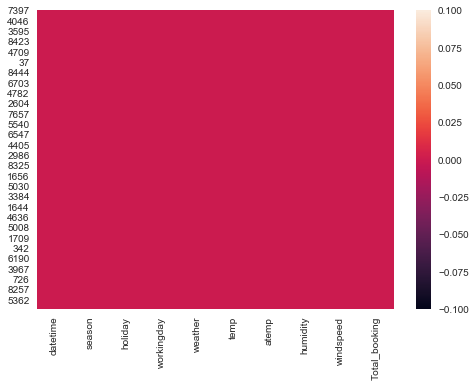

In [66]:
sns.heatmap(df.isnull())#looking for missing values

No Missing Values

In [67]:
df['Hour']=df['datetime'].apply(lambda x:x.hour)#creating new columns for hour,dayofweek,month,year
df['Day']=df['datetime'].apply(lambda x:x.dayofweek)
df['Month']=df['datetime'].apply(lambda x:x.month)
df['Year']=df['datetime'].apply(lambda x:x.year)

In [68]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Day,Month,Year
7397,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds,9.84,14.395,81,0.0000,16,0,5,1,2011
7699,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds,9.02,13.635,80,0.0000,40,1,5,1,2011
7785,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds,9.84,14.395,75,0.0000,13,3,5,1,2011
5760,2011-01-01 05:00:00,Spring,0,0,Mist + Cloudy,9.84,12.880,75,6.0032,1,5,5,1,2011
1826,2011-01-01 06:00:00,Spring,0,0,Clear + Few clouds,9.02,13.635,80,0.0000,2,6,5,1,2011


In [69]:
df.Day.unique()

array([5, 6, 0, 1, 2, 3, 4])

In [70]:
day_map={5:'Saturday',6:'Sunday',0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday'}

In [71]:
df.Day=df.Day.map(day_map)#mapping the day name

In [72]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Day,Month,Year
7397,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds,9.84,14.395,81,0.0000,16,0,Saturday,1,2011
7699,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds,9.02,13.635,80,0.0000,40,1,Saturday,1,2011
7785,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds,9.84,14.395,75,0.0000,13,3,Saturday,1,2011
5760,2011-01-01 05:00:00,Spring,0,0,Mist + Cloudy,9.84,12.880,75,6.0032,1,5,Saturday,1,2011
1826,2011-01-01 06:00:00,Spring,0,0,Clear + Few clouds,9.02,13.635,80,0.0000,2,6,Saturday,1,2011


In [73]:
df.season.unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [74]:
df.weather.unique()

array([' Clear + Few clouds', ' Mist + Cloudy ',
       ' Light Snow, Light Rain', ' Heavy Rain + Thunderstorm '],
      dtype=object)

In [75]:
df['weather']=df.weather.str.strip()#removing spaces in the string
df['season']=df.season.str.strip()

In [76]:
category = ['Hour','Day','Month','Year','season','weather','holiday','workingday']
for col in category:
    df[col] = df[col].astype("category")#converting into category

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 7397 to 4486
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8708 non-null   datetime64[ns]
 1   season         8708 non-null   category      
 2   holiday        8708 non-null   category      
 3   workingday     8708 non-null   category      
 4   weather        8708 non-null   category      
 5   temp           8708 non-null   float64       
 6   atemp          8708 non-null   float64       
 7   humidity       8708 non-null   int64         
 8   windspeed      8708 non-null   float64       
 9   Total_booking  8708 non-null   int64         
 10  Hour           8708 non-null   category      
 11  Day            8708 non-null   category      
 12  Month          8708 non-null   category      
 13  Year           8708 non-null   category      
dtypes: category(8), datetime64[ns](1), float64(3), int64(2)
memory usage:

In [78]:
df.drop('datetime',axis=1,inplace=True)

In [79]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Day,Month,Year
7397,Spring,0,0,Clear + Few clouds,9.84,14.395,81,0.0000,16,0,Saturday,1,2011
7699,Spring,0,0,Clear + Few clouds,9.02,13.635,80,0.0000,40,1,Saturday,1,2011
7785,Spring,0,0,Clear + Few clouds,9.84,14.395,75,0.0000,13,3,Saturday,1,2011
5760,Spring,0,0,Mist + Cloudy,9.84,12.880,75,6.0032,1,5,Saturday,1,2011
1826,Spring,0,0,Clear + Few clouds,9.02,13.635,80,0.0000,2,6,Saturday,1,2011


In [80]:
df=df.reset_index(drop=True)#reseting index

# Exploratory Data Analysis

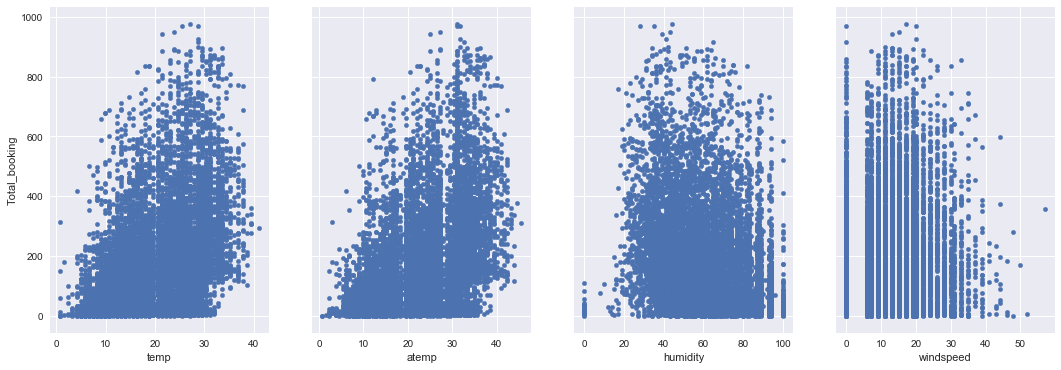

In [81]:
fig, axs = plt.subplots(1, 4, figsize=(18, 6),sharey=True)#scatter plot of numerical features with the label
df.plot(kind='scatter', x='temp', y='Total_booking', ax=axs[0])
df.plot(kind='scatter', x='atemp', y='Total_booking', ax=axs[1])
df.plot(kind='scatter', x='humidity', y='Total_booking', ax=axs[2])
df.plot(kind='scatter', x='windspeed', y='Total_booking', ax=axs[3])

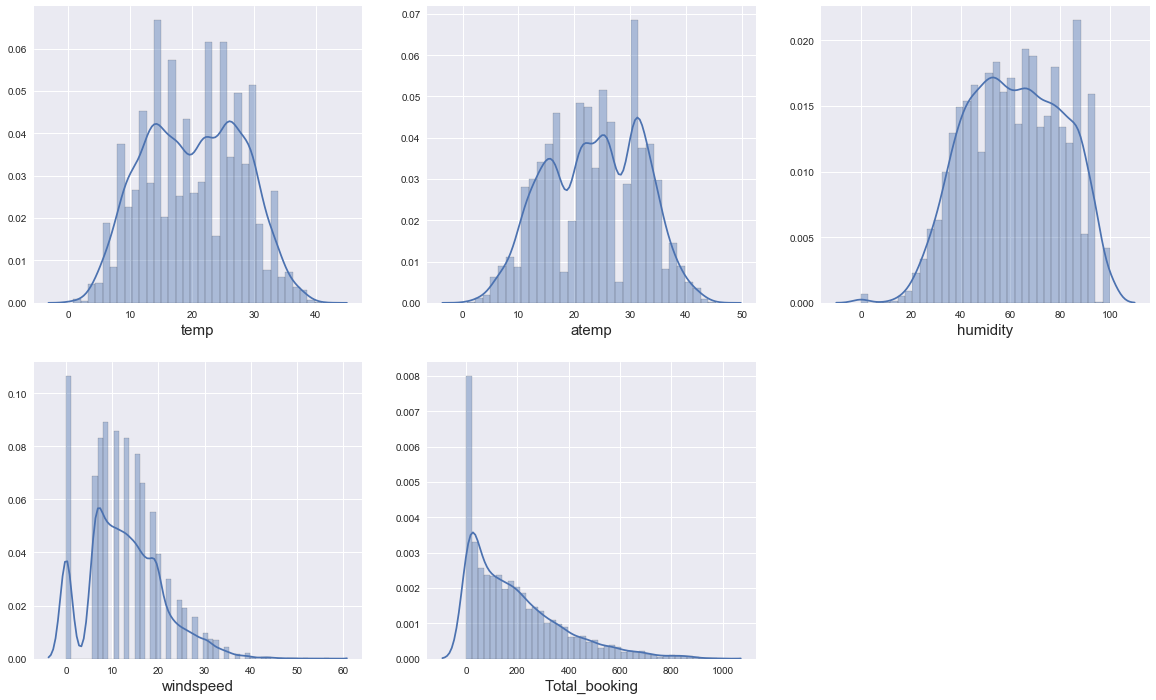

In [82]:
plt.figure(figsize=(20,12))#Examining the distribution
pos = 1

for column in df[['temp','atemp','humidity','windspeed','Total_booking']]:
    if pos<=5 : #5 columns
        ax = plt.subplot(2,3,pos)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    pos+=1
plt.show()

It can be observed that 'windspeed' and the label 'Total_booking' is skewed right.<br><br>

In [83]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Day,Month,Year
0,Spring,0,0,Clear + Few clouds,9.84,14.395,81,0.0000,16,0,Saturday,1,2011
1,Spring,0,0,Clear + Few clouds,9.02,13.635,80,0.0000,40,1,Saturday,1,2011
2,Spring,0,0,Clear + Few clouds,9.84,14.395,75,0.0000,13,3,Saturday,1,2011
3,Spring,0,0,Mist + Cloudy,9.84,12.880,75,6.0032,1,5,Saturday,1,2011
4,Spring,0,0,Clear + Few clouds,9.02,13.635,80,0.0000,2,6,Saturday,1,2011


Text(0, 0.5, 'Total_bookings')

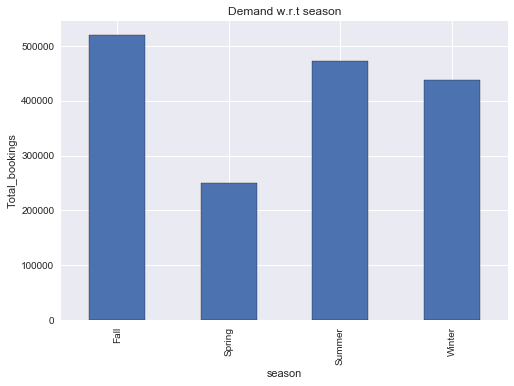

In [84]:
df.groupby('season')['Total_booking'].sum().plot(kind='bar')
plt.title('Demand w.r.t season')
plt.ylabel('Total_bookings')

Highest bookings in Fall, Lowest in Spring

Text(0, 0.5, 'Total_bookings')

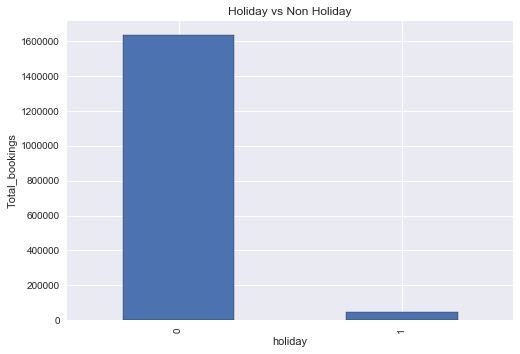

In [85]:
df.groupby('holiday')['Total_booking'].sum().plot(kind='bar')
plt.title('Holiday vs Non Holiday')
plt.ylabel('Total_bookings')

In [86]:
df.holiday.value_counts()#majority for non holidays

0    8460
1     248
Name: holiday, dtype: int64

Text(0, 0.5, 'Total_bookings')

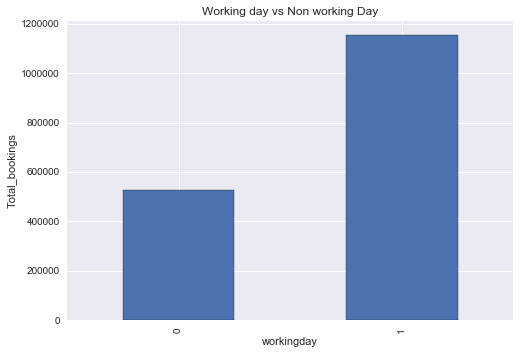

In [87]:
df.groupby('workingday')['Total_booking'].sum().plot(kind='bar')
plt.title('Working day vs Non working Day')
plt.ylabel('Total_bookings')

In [88]:
df.workingday.value_counts()#majority for working day

1    5924
0    2784
Name: workingday, dtype: int64

Text(0, 0.5, 'Total_bookings')

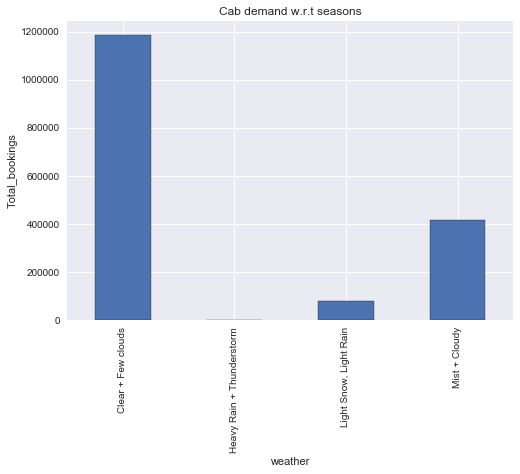

In [89]:
df.groupby('weather')['Total_booking'].sum().plot(kind='bar')
plt.title('Cab demand w.r.t seasons')
plt.ylabel('Total_bookings')

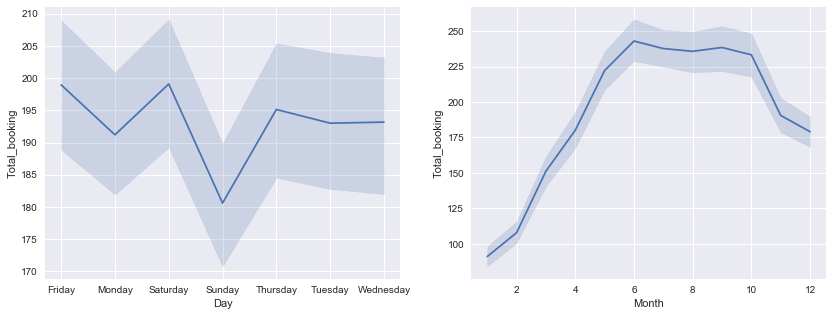

In [90]:
fig,ax=plt.subplots(1,2,figsize=(14,5))

sns.lineplot(y="Total_booking", x= "Day", data=df, ax=ax[0])
sns.lineplot(y="Total_booking", x= "Month", data=df,ax=ax[1])

On Friday's and Saturdays there is a peak in the number of bookings followed by a dip on sunday whereas The Demand on rest of the weekdays is comparatively low.<br>The Demand increases linearly from January and reaches peak in the months starting June to October and then decreases in the winter months.

Text(0.5, 1.0, 'Hourly Demand w.r.t Days')

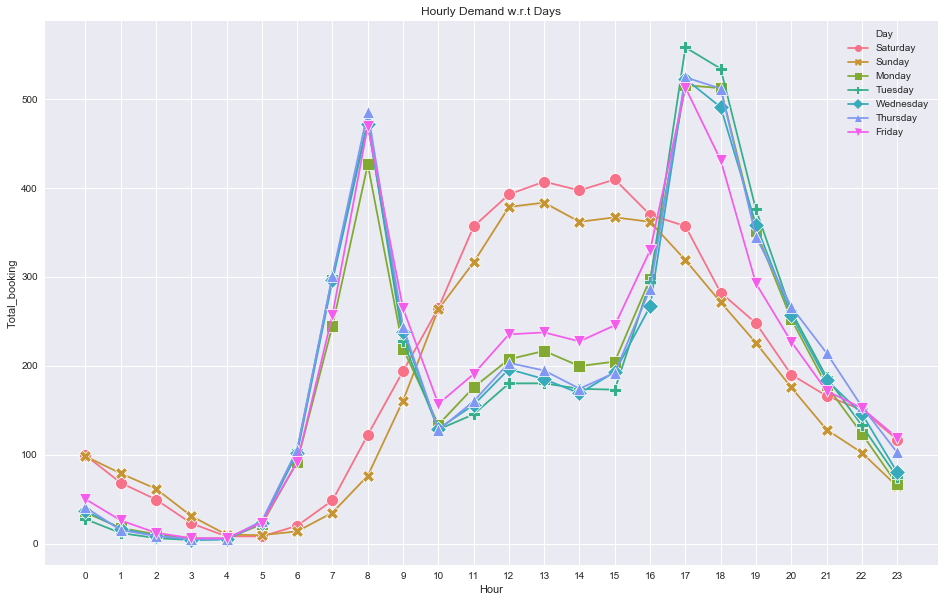

In [91]:
plt.figure(figsize=(16,10))
sns.lineplot(x='Hour',y='Total_booking',data=df,hue='Day',style='Day',markers=True, dashes=False,ci=False,markersize=12)
plt.xticks(df.Hour.unique())
plt.title('Hourly Demand w.r.t Days')

Looking at the graph above, It is evident that the peak hours are around 8am and 5pm-6pm  during weekdays representing the office hours.<br>
In case of weekends the demand gradually increases and reaches peak around noon and stays constant throughout the afternoon and then declines. 

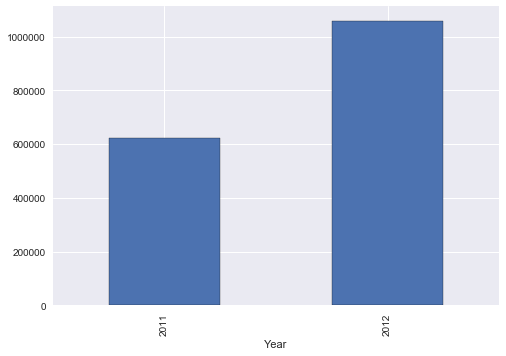

In [92]:
df.groupby('Year')['Total_booking'].sum().plot(kind='bar')

The Demand has increased from 2011 to 2012.

# Outlier Analysis

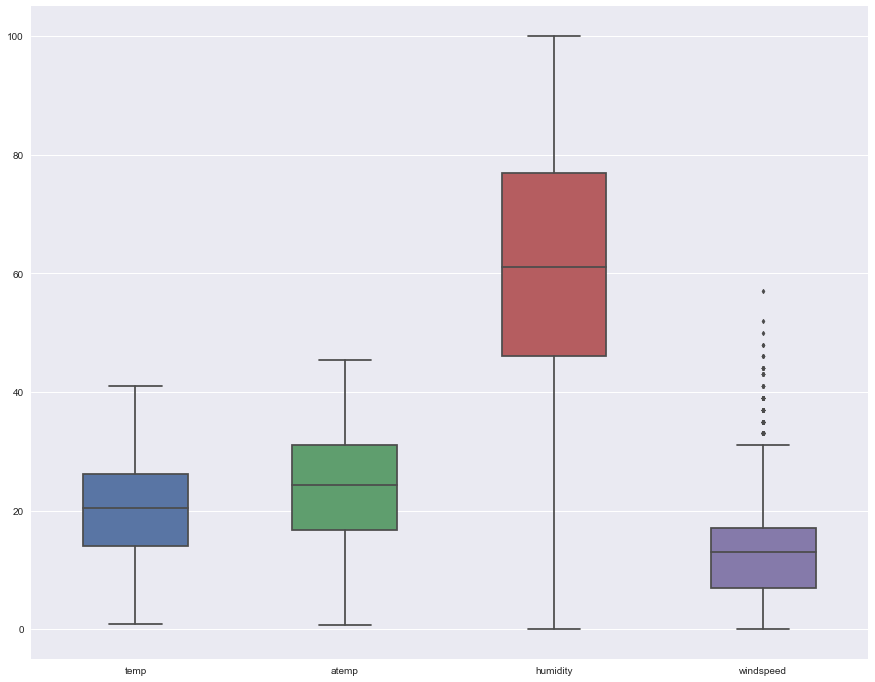

In [93]:
fig, ax = plt.subplots(figsize=(15,12))#outliers in the numerical features
sns.boxplot(data=df[['temp','atemp','humidity','windspeed']] ,width= 0.5,ax=ax,fliersize=3)

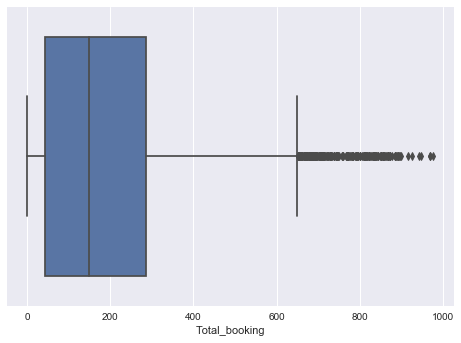

In [94]:
sns.boxplot('Total_booking',data=df)#outliers in label

In [95]:
IQR = df.Total_booking.quantile(0.75) - df.Total_booking.quantile(0.25)#defining the interquantile range

Lower = df.Total_booking.quantile(0.25) - (IQR * 1.5)
Upper = df.Total_booking.quantile(0.75) + (IQR * 1.5)

print(f' Upper Value: {Upper}')
print(f' Lower Value: {Lower}')

 Upper Value: 650.5
 Lower Value: -321.5


In [96]:
df.loc[df.Total_booking>650.5,:].describe()

,temp,atemp,humidity,windspeed,Total_booking
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,26.412810,30.134153,51.847107,13.380454,753.285124
std,5.372233,5.893854,17.363020,7.757957,79.385329
min,9.020000,10.605000,17.000000,0.000000,651.000000
25%,23.780000,26.705000,37.000000,8.998100,682.250000
50%,27.060000,31.060000,51.000000,12.998000,730.500000
75%,30.340000,33.335000,65.000000,18.500375,816.250000
max,37.720000,42.425000,94.000000,36.997400,977.000000


With 1.5 times interquantile range for outliers, there are 242 bookings which accounts for 2.7% of the data 

In [97]:
import pylab 
import scipy.stats as stats

In [98]:
def diagnostic_plots(df, variable):#function plotting a histogram and Q-Q plot
                                    
    plt.figure(figsize=(16,7))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=40)#histogram

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)#Q-Q plot

    plt.show()

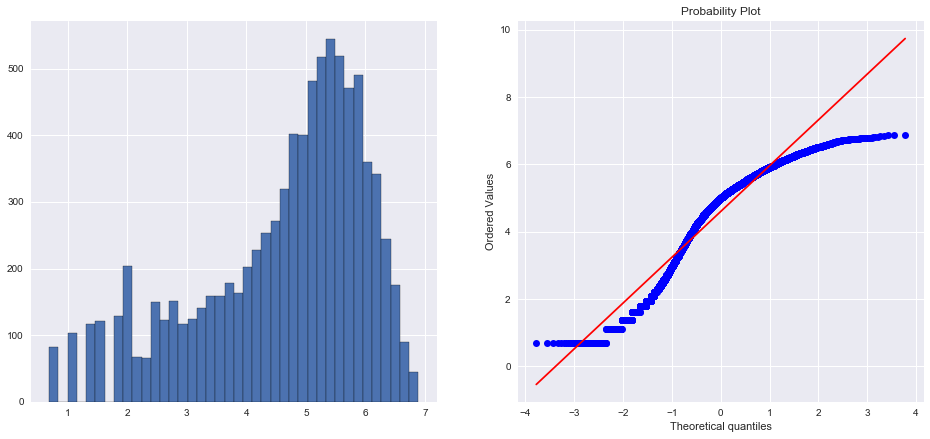

In [99]:
df['Total_booking_log'] = np.log(df.Total_booking+1)

diagnostic_plots(df,'Total_booking_log')

In [100]:
#converting into binary
df_dummies=pd.get_dummies(df[['season','weather','Hour','Day','Month','Year']],drop_first=True)

In [101]:
df_dummies

,season_Spring,season_Summer,season_Winter,weather_Heavy Rain + Thunderstorm,"weather_Light Snow, Light Rain",weather_Mist + Cloudy,Hour_1,Hour_2,Hour_3,Hour_4,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2012
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8704,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8705,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8706,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [102]:
df_new=pd.concat([df,df_dummies],axis=1)#concatenating with original

In [103]:
df_new.drop(['season','weather','Hour','Day','Month','Year'],axis=1,inplace=True)

In [104]:
df_new.head()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,Total_booking_log,season_Spring,season_Summer,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2012
0,0,0,9.84,14.395,81,0.0000,16,2.833213,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0000,40,3.713572,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.84,14.395,75,0.0000,13,2.639057,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,12.880,75,6.0032,1,0.693147,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.02,13.635,80,0.0000,2,1.098612,1,0,...,0,0,0,0,0,0,0,0,0,0


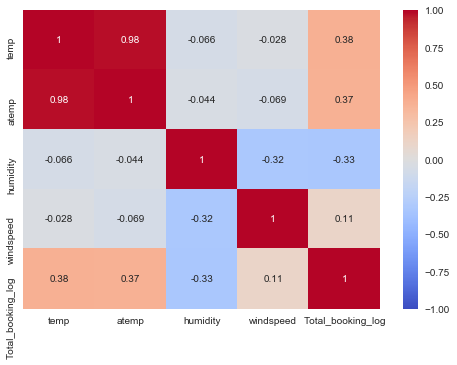

In [105]:
#Numerical correlation
sns.heatmap(df_new[['temp','atemp','humidity','windspeed','Total_booking_log']].corr(),vmin = -1, vmax = 1, center = 0, cmap ='coolwarm', annot = True)

1) temp,atemp have positive correlation whereas humidity has a negative correlation<br>
2) temp and atemp are correlated with each other, so we will choose temp fro the model.




In [106]:
df_new.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'Total_booking', 'Total_booking_log', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_Heavy Rain + Thunderstorm',
       'weather_Light Snow, Light Rain', 'weather_Mist + Cloudy', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2012'],
      dtype='object')

In [107]:
corr=df_new.corr()

In [108]:
corr.Total_booking_log.sort_values(ascending=False)

Total_booking_log                    1.000000
Total_booking                        0.820148
temp                                 0.375474
atemp                                0.370886
Hour_17                              0.208407
Hour_18                              0.189534
Year_2012                            0.185959
Hour_16                              0.150298
Hour_19                              0.146008
Hour_8                               0.143797
Hour_13                              0.116021
Hour_12                              0.115129
windspeed                            0.114687
Hour_15                              0.113996
Hour_14                              0.102650
Hour_9                               0.101354
Hour_20                              0.099810
Hour_11                              0.087142
Month_7                              0.072078
Month_6                              0.064174
Month_8                              0.059184
Hour_21                           

In [109]:
#splitting into features and label
X=df_new.drop(['Total_booking','Total_booking_log','atemp','windspeed','weather_Heavy Rain + Thunderstorm'],axis=1)
y=df_new.Total_booking_log

In [110]:
y

0       2.833213
1       3.713572
2       2.639057
3       0.693147
4       1.098612
          ...   
8703    5.820083
8704    5.488938
8705    5.129899
8706    4.867534
8707    4.488636
Name: Total_booking_log, Length: 8708, dtype: float64

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler =StandardScaler()#scaling

X_scaled = scaler.fit_transform(X)

In [113]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [114]:
X_scaled

,holiday,workingday,temp,humidity,season_Spring,season_Summer,season_Winter,"weather_Light Snow, Light Rain",weather_Mist + Cloudy,Hour_1,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2012
0,-0.171215,-1.458723,-1.331494,1.007936,1.754075,-0.580886,-0.578941,-0.290574,-0.594858,-0.205548,...,-0.303847,-0.301813,-0.303396,-0.30317,-0.302718,-0.30136,-0.298631,-0.304748,-0.303170,-1.010389
1,-0.171215,-1.458723,-1.436446,0.955848,1.754075,-0.580886,-0.578941,-0.290574,-0.594858,4.865034,...,-0.303847,-0.301813,-0.303396,-0.30317,-0.302718,-0.30136,-0.298631,-0.304748,-0.303170,-1.010389
2,-0.171215,-1.458723,-1.331494,0.695411,1.754075,-0.580886,-0.578941,-0.290574,-0.594858,-0.205548,...,-0.303847,-0.301813,-0.303396,-0.30317,-0.302718,-0.30136,-0.298631,-0.304748,-0.303170,-1.010389
3,-0.171215,-1.458723,-1.331494,0.695411,1.754075,-0.580886,-0.578941,-0.290574,1.681074,-0.205548,...,-0.303847,-0.301813,-0.303396,-0.30317,-0.302718,-0.30136,-0.298631,-0.304748,-0.303170,-1.010389
4,-0.171215,-1.458723,-1.436446,0.955848,1.754075,-0.580886,-0.578941,-0.290574,-0.594858,-0.205548,...,-0.303847,-0.301813,-0.303396,-0.30317,-0.302718,-0.30136,-0.298631,-0.304748,-0.303170,-1.010389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,-0.171215,0.685531,-0.596825,-0.606776,-0.570101,-0.580886,1.727290,-0.290574,-0.594858,-0.205548,...,-0.303847,-0.301813,-0.303396,-0.30317,-0.302718,-0.30136,-0.298631,-0.304748,3.298476,0.989718
8704,-0.171215,0.685531,-0.701778,-0.242164,-0.570101,-0.580886,1.727290,-0.290574,-0.594858,-0.205548,...,-0.303847,-0.301813,-0.303396,-0.30317,-0.302718,-0.30136,-0.298631,-0.304748,3.298476,0.989718
8705,-0.171215,0.685531,-0.806730,-0.033814,-0.570101,-0.580886,1.727290,-0.290574,-0.594858,-0.205548,...,-0.303847,-0.301813,-0.303396,-0.30317,-0.302718,-0.30136,-0.298631,-0.304748,3.298476,0.989718
8706,-0.171215,0.685531,-0.806730,-0.033814,-0.570101,-0.580886,1.727290,-0.290574,-0.594858,-0.205548,...,-0.303847,-0.301813,-0.303396,-0.30317,-0.302718,-0.30136,-0.298631,-0.304748,3.298476,0.989718


In [115]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   holiday                         8708 non-null   float64
 1   workingday                      8708 non-null   float64
 2   temp                            8708 non-null   float64
 3   humidity                        8708 non-null   float64
 4   season_Spring                   8708 non-null   float64
 5   season_Summer                   8708 non-null   float64
 6   season_Winter                   8708 non-null   float64
 7   weather_Light Snow, Light Rain  8708 non-null   float64
 8   weather_Mist + Cloudy           8708 non-null   float64
 9   Hour_1                          8708 non-null   float64
 10  Hour_2                          8708 non-null   float64
 11  Hour_3                          8708 non-null   float64
 12  Hour_4                          87

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
#splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=101)

In [118]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor




# LINEAR REGRESSION

In [119]:
lm=LinearRegression()

In [120]:
lm.fit(X_train,y_train)#fitting

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
lm_pred=lm.predict(X_test)#predicting

In [122]:
from sklearn.metrics import mean_squared_error,r2_score

In [123]:
def adj_r2(x,y):#creating a adj_r2 function
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2


In [124]:
regression=lm#assigning model 

print('r2_score:',r2_score(y_test,lm_pred))
print('adj_r2:',adj_r2(X_test,y_test) )
print('rmse:',np.sqrt(mean_squared_error(y_test,lm_pred))) 


r2_score: 0.8300226068705392
adj_r2: 0.8270120260499677
rmse: 0.585238366572259


Text(0, 0.5, 'Predicted')

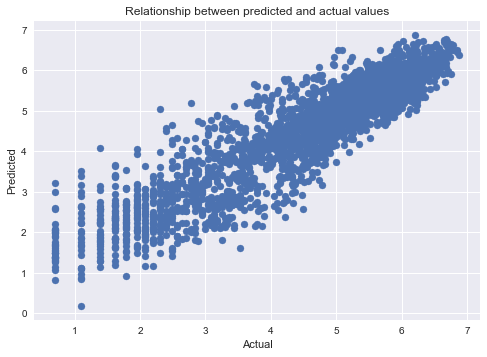

In [125]:
plt.scatter(x=y_test,y=lm_pred)
plt.title('Relationship between predicted and actual values')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0.5, 1.0, 'Residual Distribution')

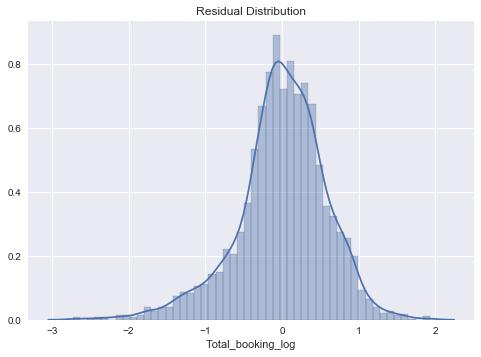

In [126]:
sns.distplot(y_test-lm_pred)
plt.title('Residual Distribution')

Regularization

In [127]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)#cross validation for alpha
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [128]:
alpha = lasscv.alpha_
alpha

7.166314640128481e-06

In [129]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

/Users/jayantjalta/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.19677743468492, tolerance: 1.1671374349348025
  positive)


Lasso(alpha=7.166314640128481e-06, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
lasso_pred=lasso_reg.predict(X_test)

In [131]:
np.sqrt(mean_squared_error(y_test,lasso_pred))

0.5847188434651497

In [132]:
r2_score(y_test,lasso_pred)

0.8303242548580483

r2 score is almost same as before regularization, therefore no problem of overfitting. 

# RANDOM FOREST

In [133]:
RF=RandomForestRegressor(n_estimators=300)

In [134]:
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [135]:
RF_pred=RF.predict(X_test)

In [136]:
regression=RF

In [137]:
print('r2_score:',r2_score(y_test,RF_pred))
print('adj_r2:',adj_r2(X_test,y_test) )
print('rmse:',np.sqrt(mean_squared_error(y_test,RF_pred))) 

r2_score: 0.8961448586219595
adj_r2: 0.8943054122638645
rmse: 0.45745798003236726


Text(0, 0.5, 'Predicted')

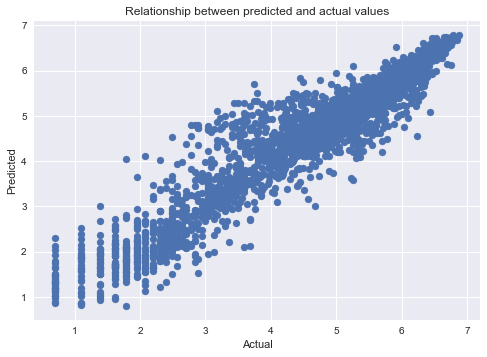

In [138]:
plt.scatter(x=y_test,y=RF_pred)
plt.title('Relationship between predicted and actual values')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0.5, 1.0, 'Residual Distribution')

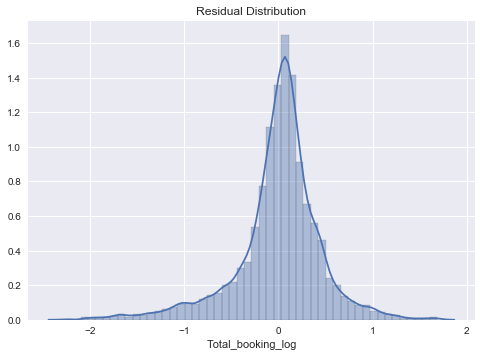

In [139]:
sns.distplot(y_test-RF_pred)
plt.title('Residual Distribution')

The Normal distribution of the residuals is better in case of Random Forest

# SVM

In [140]:
svm=SVR()

In [141]:
svm.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [142]:
svm_pred=svm.predict(X_test)

In [143]:
regression=svm

In [144]:
print('r2_score:',r2_score(y_test,svm_pred))
print('adj_r2:',adj_r2(X_test,y_test) )
print('rmse:',np.sqrt(mean_squared_error(y_test,svm_pred))) 

r2_score: 0.951104600741749
adj_r2: 0.9502385823347662
rmse: 0.3138854651936106


Text(0, 0.5, 'Predicted')

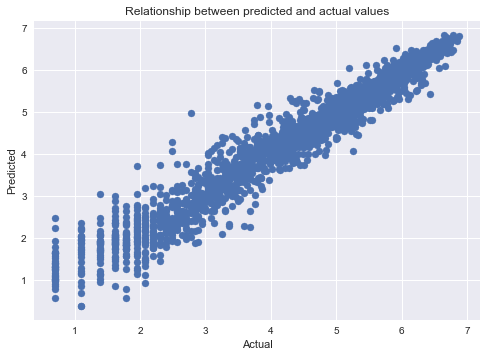

In [145]:
plt.scatter(x=y_test,y=svm_pred)
plt.title('Relationship between predicted and actual values')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0.5, 1.0, 'Residual Distribution')

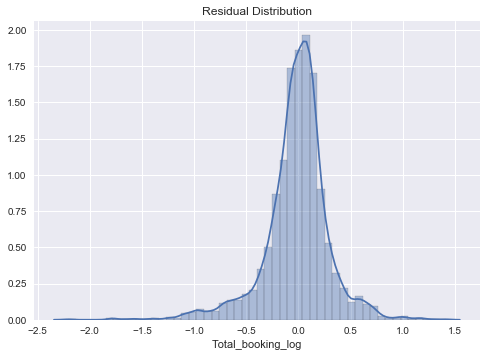

In [146]:
sns.distplot(y_test-svm_pred)
plt.title('Residual Distribution')

# Evaluation report

In [147]:
#creating a dictionary for metrics
d = {'r2_score': [0.83,0.8960,0.9511], 'adj_r2':[0.82,0.8942,0.9502],'RMSE': [0.58,0.45,0.31]}

In [148]:
pd.DataFrame(d,index=['Linear Model','Random Forest','SVM'])

,r2_score,adj_r2,RMSE
Linear Model,0.8300,0.8200,0.58
Random Forest,0.8960,0.8942,0.45
SVM,0.9511,0.9502,0.31


Comparing the Adj_r2 and RMSE, SVR performs the best as compared to Random Forest and Linear Model.<br>
I will choose SVR in this case.


# TESTING

In [149]:
test=pd.read_csv('test.csv')

In [150]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [151]:
test.datetime=pd.to_datetime(test.datetime)

In [152]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [153]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    2178 non-null   datetime64[ns]
 1   season      2178 non-null   object        
 2   holiday     2178 non-null   int64         
 3   workingday  2178 non-null   int64         
 4   weather     2178 non-null   object        
 5   temp        2178 non-null   float64       
 6   atemp       2178 non-null   float64       
 7   humidity    2178 non-null   int64         
 8   windspeed   2178 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 153.3+ KB


In [154]:
test['Hour']=test['datetime'].apply(lambda x:x.hour)#creating new columns for hour,dayofweek,month,year
test['Day']=test['datetime'].apply(lambda x:x.dayofweek)
test['Month']=test['datetime'].apply(lambda x:x.month)
test['Year']=test['datetime'].apply(lambda x:x.year)

In [155]:
day_map={5:'Saturday',6:'Sunday',0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday'}

In [156]:
test.Day=test.Day.map(day_map)

In [157]:
test['weather']=test.weather.str.strip()
test['season']=test.season.str.strip()

In [158]:
category = ['Hour','Day','Month','Year','season','weather','holiday','workingday']
for col in category:
    test[col] = test[col].astype("category")

In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    2178 non-null   datetime64[ns]
 1   season      2178 non-null   category      
 2   holiday     2178 non-null   category      
 3   workingday  2178 non-null   category      
 4   weather     2178 non-null   category      
 5   temp        2178 non-null   float64       
 6   atemp       2178 non-null   float64       
 7   humidity    2178 non-null   int64         
 8   windspeed   2178 non-null   float64       
 9   Hour        2178 non-null   category      
 10  Day         2178 non-null   category      
 11  Month       2178 non-null   category      
 12  Year        2178 non-null   category      
dtypes: category(8), datetime64[ns](1), float64(3), int64(1)
memory usage: 104.4 KB


In [160]:
test.drop('datetime',axis=1,inplace=True)

In [161]:
test=test.reset_index(drop=True)#reseting index

In [162]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Hour,Day,Month,Year
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,11,Thursday,5,2012
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,7,Saturday,6,2012
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,20,Sunday,3,2011
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,11,Thursday,10,2011
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,12,Saturday,6,2012


In [163]:
test_dummies=pd.get_dummies(test[['season','weather','Hour','Day','Month','Year']],drop_first=True)

In [164]:
test_new=pd.concat([test,test_dummies],axis=1)

In [165]:
test_new.drop(['season','weather','Hour','Day','Month','Year','atemp','windspeed'],axis=1,inplace=True)

In [166]:
test_new.head()


,holiday,workingday,temp,humidity,season_Spring,season_Summer,season_Winter,"weather_Light Snow, Light Rain",weather_Mist + Cloudy,Hour_1,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2012
0,0,1,21.32,48,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,23.78,64,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,11.48,100,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,25.42,83,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,25.42,43,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [167]:
X.head()

,holiday,workingday,temp,humidity,season_Spring,season_Summer,season_Winter,"weather_Light Snow, Light Rain",weather_Mist + Cloudy,Hour_1,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2012
0,0,0,9.84,81,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,80,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.84,75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,75,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.02,80,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
scale_test=StandardScaler()

In [171]:
test_scaled=scale_test.fit_transform(test_new)

In [172]:
test_scaled=pd.DataFrame(test_scaled,columns=test_new.columns)

# Predictions

In [173]:
test_predictions=svm.predict(test_scaled)#Predicting using a svr 

In [174]:
predictions_final = np.exp(test_predictions)-1#converting to original scale

In [175]:
Final_predictions=pd.Series(predictions_final,name='Predictions')

In [176]:
Final_predictions

0       251.986808
1        99.978964
2        26.852665
3       139.950316
4       626.005395
           ...    
2173      3.671062
2174    133.341433
2175    156.948054
2176     24.233403
2177    315.945635
Name: Predictions, Length: 2178, dtype: float64

In [177]:
final_preds=pd.DataFrame(Final_predictions)

In [178]:
predictions=final_preds.to_csv('Predictons.csv')

In [179]:
test_label=pd.read_csv('test_label.csv',header=None)

In [187]:
test_label

,0
0,256
1,87
2,11
3,84
4,668
...,...
2173,3
2174,144
2175,159
2176,29


In [200]:
test=pd.concat([test,Final_predictions],axis=1)

In [201]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Hour,Day,Month,Year,Predictions
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,11,Thursday,5,2012,251.986808
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,7,Saturday,6,2012,99.978964
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,20,Sunday,3,2011,26.852665
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,11,Thursday,10,2011,139.950316
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,12,Saturday,6,2012,626.005395
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,Thursday,3,2012,3.671062
2174,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,12,Thursday,1,2012,133.341433
2175,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,22,Wednesday,3,2012,156.948054
2176,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,5,Thursday,5,2011,24.233403
